# Crypto Evaluator

## Import dependencies and raw data

In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [10]:
raw_df = pd.read_csv('crypto_data.csv')
raw_df.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
811,XIOS,Xios,Scrypt,True,PoW/PoS,2.149688e+06,21000000
489,EGO,EGOcoin,PoS,True,PoS,NaN,60000000
458,ZNE,ZoneCoin,Scrypt,True,PoW/PoS,2.581970e+06,21000000
40,BET,BetaCoin,SHA-256,True,PoW,0.000000e+00,32000000
201,XCSH,Xcash,Scrypt,False,PoW/PoS,NaN,2400000
328,BLITZ,BlitzCoin,X13,True,PoS,0.000000e+00,3852156
290,XMS,Megastake,X11,True,PoW/PoS,NaN,0
61,CAT,Catcoin,Scrypt,True,PoW,7.219957e+06,21000000
439,EXB,ExaByte (EXB),SHA-256,True,PoW,NaN,500000000
566,NPC,NPCcoin,SHA-256D,True,PoW/PoS,0.000000e+00,7000000000


## Clean data

In [8]:
# Drop non-trading currencies
traded_df = raw_df.loc[raw_df['IsTrading'] == True]
traded_df.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
971,ZEL,Zelcash,Equihash,True,PoW/PoS,0.000000e+00,210000000
986,CHARM,Charm Coin,NeoScrypt,True,PoW,NaN,250000000
384,FLX,Flash,Scrypt,True,PoW/PoS,NaN,1000000
110,HYP,HyperStake,X11,True,PoS,1.678520e+09,0
620,LENIN,LeninCoin,SHA-256D,True,PoW,NaN,100000000
551,DRM8,Dream8Coin,Scrypt,True,PoW,NaN,88800000000
336,HODL,HOdlcoin,1GB AES Pattern Search,True,PoW,1.144895e+07,81962100
851,DAXX,DaxxCoin,Ethash,True,PoW,5.208918e+08,10000000000
727,PZM,Prizm,SHA-256,True,PoS,NaN,600000000000000
80,DVC,DevCoin,SHA-256,True,PoW,1.877386e+10,21000000000


In [16]:
# Drop IsTrading column
traded_df2 = traded_df.drop(['IsTrading'], axis=1)
traded_df2.sample(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
889,ITZ,Interzone,C11,PoW,1.191659e+07,23000000
800,TER,TerraNovaCoin,Scrypt,PoW/PoS,1.140735e+06,15733333
1034,TRVC,Trivechain,X16R,PoW/PoS,3.692312e+07,82546564
1087,BTXC,Bettex coin,XEVAN,PoS,6.787405e+06,50000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
482,XPO,Opair,PoS,PoS,7.403381e+07,74000000
595,MIS,MIScoin,X11,PoW/PoS,NaN,25000000
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
458,ZNE,ZoneCoin,Scrypt,PoW/PoS,2.581970e+06,21000000
1169,XWT,World Trade Funds,X15,PoW/PoS,NaN,1000000


In [23]:
# Drop NaN rows
dropna_df = traded_df2.dropna()
dropna_df.sample(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
250,MARYJ,MaryJane Coin,X15,PoW/PoS,0.000000e+00,0
176,SYS,SysCoin,SHA-256,PoW,5.633365e+08,888000000
792,SUMO,Sumokoin,CryptoNight,PoW,8.946653e+06,88888888
862,POP,PopularCoin,Scrypt,PoW,3.964201e+09,4999999999
1202,TRI,Triangles Coin,X13,PoW/PoS,1.407778e+05,120000
970,ALPS,Alpenschillling,Lyra2Z,PoW,2.734050e+07,300000000
778,CMPCO,CampusCoin,Scrypt,PoW,0.000000e+00,1010000000
251,OMC,OmniCron,Scrypt,PoW,1.014004e+07,3371337
765,LINDA,Linda,Scrypt,PoW/PoS,9.044931e+09,50000000000
799,ELM,Elements,X11,PoW,2.702856e+09,1800000000


In [26]:
# Drop currencies without mining
mined_df = dropna_df.loc[dropna_df['TotalCoinsMined'] > 0]
mined_df.sample(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
1031,PLUS1,PlusOneCoin,HMQ1725,PoW,8.645406e+06,21000000
1155,LDOGE,LiteDoge,Scrypt,PoW/PoS,1.531889e+10,35000000000
787,ACC,AdCoin,Scrypt,PoW,3.264673e+07,100000000
188,URO,UroCoin,X11,PoW,1.207310e+06,0
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1030,XMN,Motion,X16R,PoW,8.125865e+06,22075700
858,LTHN,Lethean,CryptoNight-V7,PoW,4.412502e+08,999481516
482,XPO,Opair,PoS,PoS,7.403381e+07,74000000
1237,NXT,Nxt,PoS,PoS/LPoS,1.000000e+09,1000000000
1140,BEET,Beetle Coin,XEVAN,PoW/PoS,1.989381e+08,500000000


In [30]:
# Drop non-important columns (currency names)
clean_df = mined_df.drop(['Unnamed: 0','CoinName'], axis=1)
clean_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
9,Scrypt,PoW,6.303924e+07,84000000
10,X11,PoW/PoS,9.031294e+06,22000000
11,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethash,PoW,1.133597e+08,210000000
13,Equihash,PoW,7.383056e+06,21000000


In [32]:
# Convert total coins to a number
clean_df['TotalCoinSupply'] = pd.to_numeric(clean_df['TotalCoinSupply'])

# Get dummies

In [33]:
# Get dummies: convert categorical columns to numeric
dummies_df = pd.get_dummies(clean_df)
dummies_df.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,8.400000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,9.031294e+06,2.200000e+07,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1.720114e+07,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.133597e+08,2.100000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,7.383056e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Getting dummies added a lot of columns because it splits each non-numeric column into categories and passes a 1 if in that category and a 0 otherwise.

# Scale data

In [38]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(dummies_df)

## Reduce dimensions with PCA

In [43]:
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(pca_data)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.266896e-11,-1.619756e-14,1.854802e-14,-0.007129,-1.319756,-0.051813,...,-2.943328e-17,-1.628190e-15,-4.185189e-16,8.794398e-16,-9.284059e-16,-1.851279e-16,-4.030770e-15,-3.517208e-15,-3.120659e-16,-2.207235e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.256567e-11,-1.603305e-14,1.875772e-14,-0.007739,-1.322514,-0.056674,...,-3.750933e-16,-2.249261e-15,-1.368878e-15,1.726122e-15,-7.743451e-16,-1.363041e-16,-5.475716e-15,-3.691386e-15,8.498541e-17,-2.698160e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.292765e-11,-1.779318e-14,3.663700e-14,-0.054781,-1.542879,-0.943951,...,-2.069765e-14,5.059999e-14,1.297215e-14,-4.743833e-14,-2.156463e-14,3.995776e-15,6.108146e-14,1.079485e-14,1.831510e-15,1.019114e-13
3,-0.145184,-1.320593,0.192813,-0.001229,1.114521e-11,4.272979e-15,-8.915563e-15,-0.002071,0.281463,0.251862,...,-4.594302e-15,7.090820e-15,6.383691e-15,-4.074385e-15,-8.289274e-15,6.411749e-15,3.022296e-15,4.236852e-15,-3.298000e-15,9.484947e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.547472e-11,9.087760e-15,-1.582915e-14,0.027735,0.519099,0.188820,...,8.779275e-15,3.361138e-14,2.896883e-14,-6.970282e-14,-1.745972e-13,1.138857e-13,2.130554e-14,7.910416e-14,-4.658741e-14,2.998087e-14


#### PCA reduced the number of dimensions from 98 to 74. This preserves 90% of the explained variance.

## Reduce dimensions with t-SNE

In [44]:
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(pca_data)

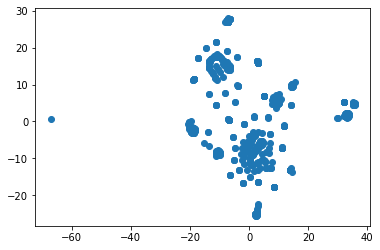

In [45]:
plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()

#### The dimension reduction has created distinct clusters with a number of outliers